# CCAT Test-G3

This notebook contains analysis of simulated G3 files sent to me by Sourav Sarkar. Analyzing these files is a useful practice excercise, and provides a look into how the G3 format is used within the CCAT collaboration.

The data used can be obtained at https://drive.google.com/file/d/1C_zmKswTygGWSmXbx7ChctNZ4ty6yfxn/view.

Total download size: ~400MB

In [2]:
from traceback import print_tb

from matplotlib.colors import LogNorm
from pyparsing import quoted_string
from spt3g import core
from spt3g.core import G3Units as U
import numpy as np
import matplotlib.pyplot as plt
import sys

In [1]:
import so3g.proj

In [3]:
filename = "test_g3/test_patch-0-1/frames-0000.g3"

In [4]:
class PrintFrameType(core.G3Module):
    def __init__(self):
        super(PrintFrameType, self).__init__()
        self.previous_type = None
        self.num_repeats = 0
    def Process(self, frame):
        type = frame.type
        if type == self.previous_type:
            self.num_repeats += 1
            print(f"{type} (x{self.num_repeats + 1})", end='\r')
        else:
            print()
            print(f"{type}", end='\r')
            self.num_repeats = 0
        self.previous_type = type

pipe = core.G3Pipeline()
pipe.Add(core.G3Reader, filename=filename)
pipe.Add(PrintFrameType)

pipe.Run()


Observation
Calibration
PipelineInfo
Scan (x42)


In [5]:
obsframe = list(core.G3File(filename))[0]
print(obsframe)
for detector_set in obsframe["observation_detector_sets"]:
    print(detector_set)
print("scan_el", obsframe["scan_el"] / U.deg)
print("scan_max_az", obsframe["scan_max_az"] / U.deg)
print("scan_min_az", obsframe["scan_min_az"] / U.deg)

Frame (Observation) [
"observation_detector_sets" (spt3g.core.G3VectorVectorString) => 54 elements
"observation_name" (spt3g.core.G3String) => "test_patch-0-1"
"observation_uid" (spt3g.core.G3Int) => 2893290703
"scan_el" (spt3g.core.G3Double) => 0.541925
"scan_el_astropy_units" (spt3g.core.G3String) => "deg"
"scan_el_units" (spt3g.core.G3Int) => 6
"scan_max_az" (spt3g.core.G3Double) => 2.25621
"scan_max_az_astropy_units" (spt3g.core.G3String) => "rad"
"scan_max_az_units" (spt3g.core.G3Int) => 6
"scan_max_el" (spt3g.core.G3Double) => 0.541925
"scan_max_el_astropy_units" (spt3g.core.G3String) => "rad"
"scan_max_el_units" (spt3g.core.G3Int) => 6
"scan_min_az" (spt3g.core.G3Double) => 2.15057
"scan_min_az_astropy_units" (spt3g.core.G3String) => "rad"
"scan_min_az_units" (spt3g.core.G3Int) => 6
"scan_min_el" (spt3g.core.G3Double) => 0.541925
"scan_min_el_astropy_units" (spt3g.core.G3String) => "rad"
"scan_min_el_units" (spt3g.core.G3Int) => 6
"session_class" (spt3g.core.G3String) => "toast.

In [6]:
calframe = list(core.G3File(filename))[1]
print(calframe)

Frame (Calibration) [
"el_noise_model" (spt3g.core.G3VectorUnsignedChar) => 26468 elements
"el_noise_model_class" (spt3g.core.G3String) => "toast.noise.Noise"
"focalplane" (spt3g.core.G3VectorUnsignedChar) => 13861 elements
"noise_model" (spt3g.core.G3VectorUnsignedChar) => 29578 elements
"noise_model_class" (spt3g.core.G3String) => "toast.noise_sim.AnalyticNoise"
]


In [7]:
pipeinfoframe = list(core.G3File(filename))[2]
print(pipeinfoframe)

Frame (PipelineInfo) [
"12-Mar-2024:13:51:52.989676000" (spt3g.core.G3PipelineInfo) => master branch, no local diffs
]


In [8]:
firstscanframe = list(core.G3File(filename))[3]
print(firstscanframe)

Frame (Scan) [
"azimuth" (spt3g.core.G3VectorDouble) => 2541 elements
"boresight_azel" (spt3g.core.G3VectorQuat) => 2541 elements
"boresight_radec" (spt3g.core.G3VectorQuat) => 2541 elements
"compress_flags_D00A-280_gain" (spt3g.core.G3Int) => 1
"compress_flags_D00A-280_offset" (spt3g.core.G3Double) => 0
"compress_flags_D00A-280_units" (spt3g.core.G3Int) => 1
"compress_flags_D00B-280_gain" (spt3g.core.G3Int) => 1
"compress_flags_D00B-280_offset" (spt3g.core.G3Double) => 0
"compress_flags_D00B-280_units" (spt3g.core.G3Int) => 1
"compress_flags_D01A-280_gain" (spt3g.core.G3Int) => 1
"compress_flags_D01A-280_offset" (spt3g.core.G3Double) => 0
"compress_flags_D01A-280_units" (spt3g.core.G3Int) => 1
"compress_flags_D01B-280_gain" (spt3g.core.G3Int) => 1
"compress_flags_D01B-280_offset" (spt3g.core.G3Double) => 0
"compress_flags_D01B-280_units" (spt3g.core.G3Int) => 1
"compress_flags_D02A-280_gain" (spt3g.core.G3Int) => 1
"compress_flags_D02A-280_offset" (spt3g.core.G3Double) => 0
"compress_

In [9]:
# https://so3g.readthedocs.io/en/latest/proj.html
first_azel_quat = firstscanframe["boresight_azel"][0]
print(so3g.proj.quat.decompose_lonlat(first_azel_quat))
print(firstscanframe["azimuth"][0])
print(firstscanframe["elevation"][0])

(np.float64(-2.1624629432209743), np.float64(0.5419247327442394), np.float64(0.0))
2.1624629432209743
0.5419247327442394


In [10]:
first_radec_quat = firstscanframe["boresight_radec"][0]
ra, dec, psi = so3g.proj.quat.decompose_lonlat(first_radec_quat)
print(f"R.A.: {ra / U.deg}°, Dec.:{dec / U.deg}°")

R.A.: 41.866813977128324°, Dec.:-39.99395670868702°


## Coordinates

Analysis of the coordinates being scanned in RA/Dec and Az/El

Looking at the first scan frame only for now.

In [11]:
from astropy.coordinates import SkyCoord, AltAz, EarthLocation
import astropy.units

In [12]:
azel_quats = firstscanframe["boresight_azel"]
az, el, psi = so3g.proj.quat.decompose_lonlat(azel_quats)

In [13]:
timespan = firstscanframe["signal"].stop.time - firstscanframe["signal"].start.time
print("boresight_azel data rate: ", len(azel_quats) / (timespan / U.sec), "Hz")

boresight_azel data rate:  200.07874015748033 Hz


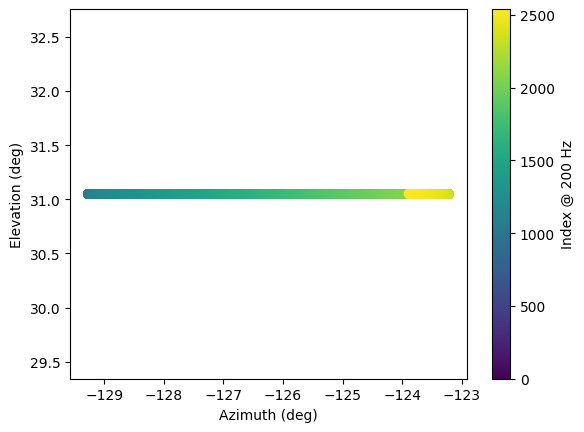

Text(0, 0.5, 'Azimuth (deg)')

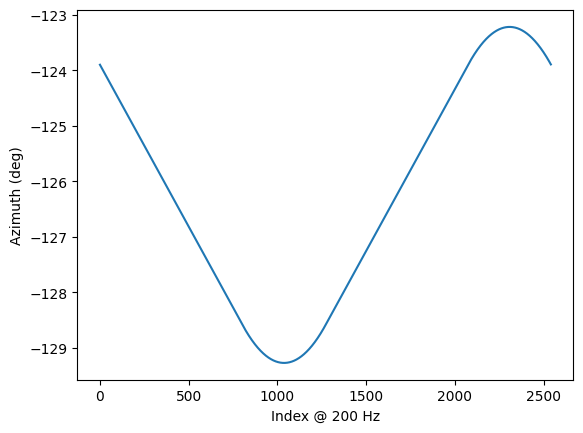

In [14]:
plt.scatter(az / U.deg, el / U.deg, c=range(len(az)))
plt.xlabel("Azimuth (deg)")
plt.ylabel("Elevation (deg)")
plt.colorbar(label="Index @ 200 Hz")
plt.show()

plt.plot(az / U.deg)
plt.xlabel("Index @ 200 Hz")
plt.ylabel("Azimuth (deg)")

In [15]:
radec_quats = firstscanframe["boresight_radec"]
ra, dec, psi = so3g.proj.quat.decompose_lonlat(radec_quats)

In [16]:
times_seconds = astropy.time.Time([g3time.time / U.sec for g3time in firstscanframe["times"]], format="unix")

lat_deg = obsframe["site_lat_deg"]*astropy.units.deg
lon_deg = obsframe["site_lon_deg"]*astropy.units.deg
alt_m = obsframe["site_alt_m"]*astropy.units.m
fyst_location = EarthLocation(lat=lat_deg, lon=lon_deg, height=alt_m)

sky_coords = SkyCoord(alt=el/U.deg*astropy.units.deg, az=az/U.deg*astropy.units.deg, obstime=times_seconds, frame='altaz', location=fyst_location)

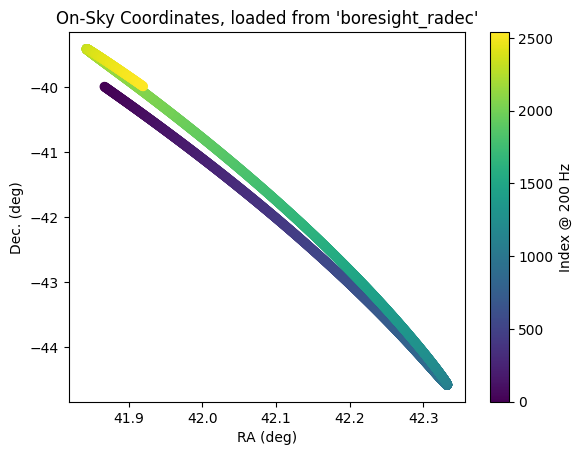

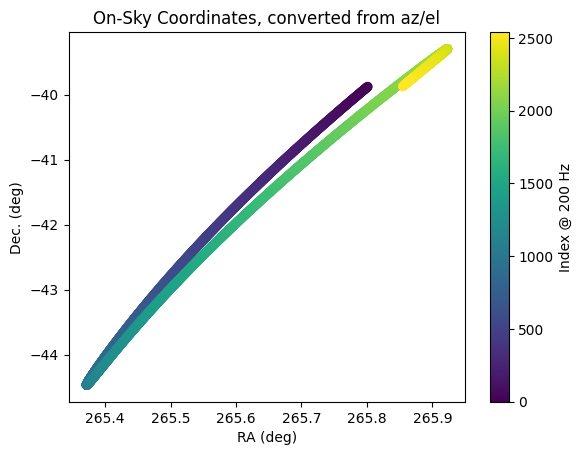

In [17]:
plt.scatter(ra / U.deg, dec / U.deg, c=range(len(az)))
plt.title("On-Sky Coordinates, loaded from 'boresight_radec'")
plt.xlabel("RA (deg)")
plt.ylabel("Dec. (deg)")
plt.colorbar(label="Index @ 200 Hz")
plt.show()
# I think the method of getting ra/dec above is correct;
# using http://www.stevegs.com/utils/jd_calc/ and https://astrogreg.com/convert_ra_dec_to_alt_az.html
# I find that only the "boresight_radec" gives a ra/dec result consistent with the alt/az data

plt.scatter(sky_coords.icrs.ra.deg, sky_coords.icrs.dec.deg, c=range(len(sky_coords)))
plt.title("On-Sky Coordinates, converted from az/el")
plt.xlabel("RA (deg)")
plt.ylabel("Dec. (deg)")
plt.colorbar(label="Index @ 200 Hz")
plt.show()

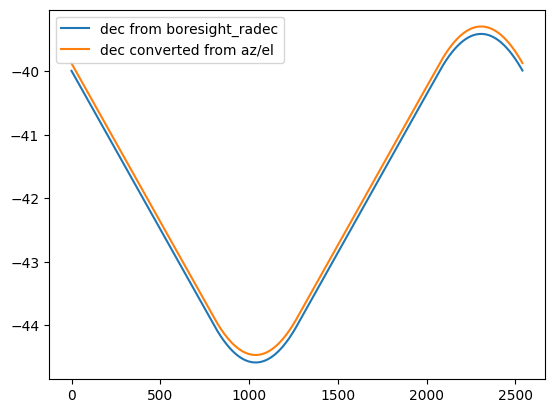

In [18]:
plt.plot(dec / U.deg, label="dec from boresight_radec")
plt.plot(sky_coords.icrs.dec.deg, label="dec converted from az/el")
plt.legend()
plt.show()

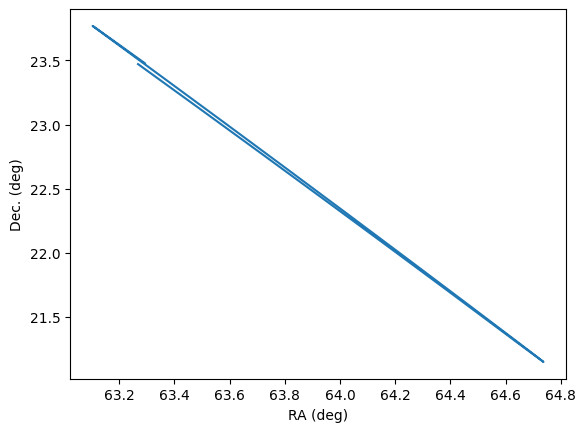

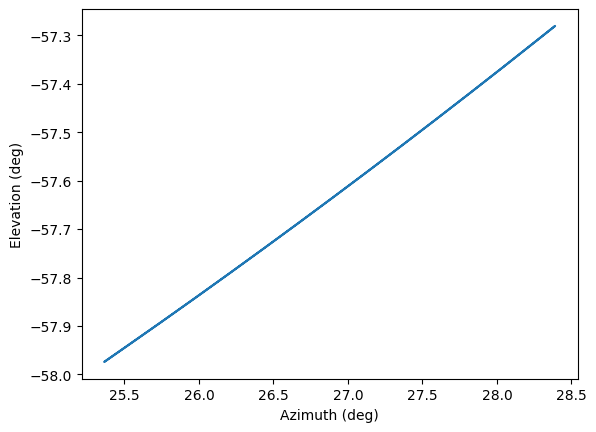

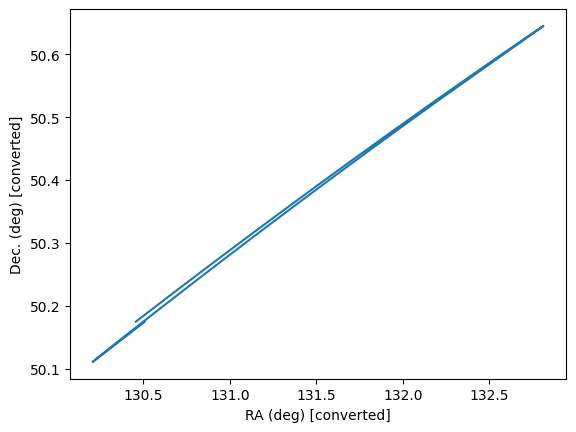

In [19]:
import spt3g.maps
ra, dec = spt3g.maps.quat_to_ang(radec_quats)
plt.plot(ra / U.deg, dec / U.deg)
plt.xlabel("RA (deg)")
plt.ylabel("Dec. (deg)")
plt.show()

az, el = spt3g.maps.quat_to_ang(azel_quats)
plt.plot(az / U.deg, el / U.deg)
plt.xlabel("Azimuth (deg)")
plt.ylabel("Elevation (deg)")
plt.show()

ra_conv, dec_conv = spt3g.maps.convert_azel_to_radec(az, el, fyst_location, times_seconds)
plt.plot(ra_conv / U.deg, dec_conv / U.deg)
plt.xlabel("RA (deg) [converted]")
plt.ylabel("Dec. (deg) [converted]")
plt.show()

In [20]:
def PlotRaDec(frame):
    # skip any frame that doesn't contain the right key
    if "boresight_radec" not in frame:
        return

    radec_quats = frame["boresight_radec"]
    ra, dec, psi = so3g.proj.quat.decompose_lonlat(radec_quats)
    # plot coordinates in real units
    plt.plot(ra / U.deg, dec / U.deg)


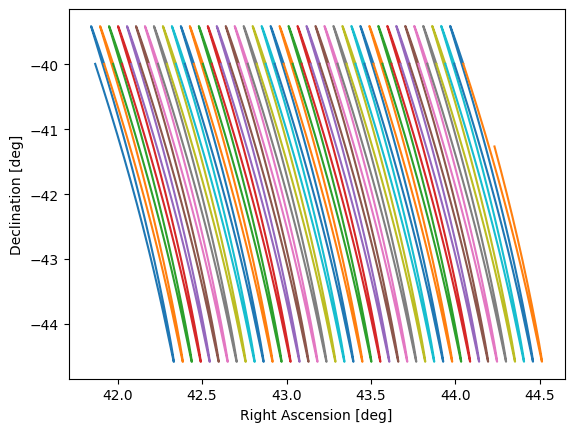

In [21]:
pipe = core.G3Pipeline()
pipe.Add(core.G3Reader, filename=filename)
pipe.Add(PlotRaDec)
pipe.Run()

plt.xlabel("Right Ascension [deg]")
plt.ylabel("Declination [deg]")
plt.show()

G3TimestreamMap ndarray shape:  (54, 2541)
Common-mode shape (2541,)


Text(0, 0.5, 'Common-mode across 54 detectors')

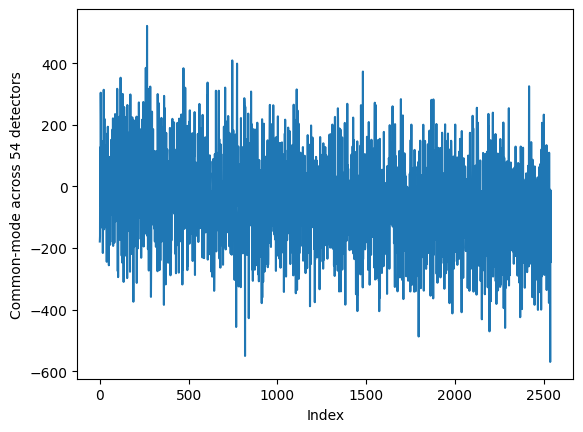

In [22]:
# for key in firstscanframe['signal'].keys():
#     plt.plot(np.array(firstscanframe['signal'][key]))
#     plt.show()

arr = np.array(firstscanframe['signal'])
print("G3TimestreamMap ndarray shape: ", arr.shape)  # detector, timestream
common_mode = np.mean(arr, axis=0)
print("Common-mode shape", common_mode.shape)
plt.plot(common_mode)
plt.xlabel("Index")
plt.ylabel("Common-mode across 54 detectors")

In [23]:
# center of the sky map
ra0 = 43.3 * U.deg
dec0 = -42.0 * U.deg

# map dimensions
xlen = 2 * U.deg
ylen = 4 * U.deg

# pixel resolution
res = 5 * U.arcmin

# number of bins along each axis
nx = int(xlen / res)
ny = int(ylen / res)

# bin edges
ra_edges = np.linspace(-xlen / 2, xlen / 2, nx + 1) + ra0
dec_edges = np.linspace(-ylen / 2, ylen / 2, ny + 1) + dec0

In [24]:
def remove_common_mode(frame):
    # skip frames that don't contain the input key
    if "signal" not in frame:
        return

    # get the input timestream data
    ts_in = frame["signal"]

    # convert to 2D numpy array of shape (ndet, nsamp)
    tsarr = np.array(ts_in)  # copy

    # list of detectors
    dets = ts_in.keys()

    # calibration array for all detectors present in ts_in
    common_mode = np.mean(tsarr, axis=0)

    # in-place math with broadcasting
    tsarr = tsarr - common_mode

    # create output object with correct timestamps and units
    ts_out = core.G3TimestreamMap(dets, tsarr, ts_in.start, ts_in.stop, core.G3TimestreamUnits.Power)

    # store the calibrated timestreams to the output key in the frame
    frame["CtRemovedTimestreams"] = ts_out

In [25]:
class SingleMapBinner:
    def __init__(self, det, timestreams="CtRemovedTimestreams"):
        self.det = det
        self.timestreams = timestreams

        # array for storing the binned timestream data
        self.data = np.zeros((ny, nx), dtype=float)

        # array for storing the number of times each pixel is "hit" in the timestreams
        self.hits = np.zeros((ny, nx), dtype=float)
    
    def __call__(self, frame):
        if self.timestreams not in frame:
            return

        if self.det not in frame[self.timestreams]:
            return

        ts = frame[self.timestreams][self.det]

        # calculate offset pointing
        radec_quats = frame["boresight_radec"]
        x, y, _ = so3g.proj.quat.decompose_lonlat(radec_quats)

        # update data and hits, in-place
        self.data += np.histogram2d(y, x, bins=[dec_edges, ra_edges], weights=ts)[0]
        self.hits += np.histogram2d(y, x, bins=[dec_edges, ra_edges])[0]

Before ct removal:  -180.38332
After ct removal:  -126.76618
Difference ct removal:  -53.617134
Before ct removal:  -131.83629
After ct removal:  -122.03155
Difference ct removal:  -9.804741
Before ct removal:  295.07397
After ct removal:  311.3742
Difference ct removal:  -16.300232
Before ct removal:  -39.22432
After ct removal:  -33.153706
Difference ct removal:  -6.070614
Before ct removal:  348.07596
After ct removal:  366.90375
Difference ct removal:  -18.82779
Before ct removal:  382.54388
After ct removal:  361.2615
Difference ct removal:  21.28238
Before ct removal:  -16.839434
After ct removal:  17.33552
Difference ct removal:  -34.174953
Before ct removal:  -60.877213
After ct removal:  -71.75364
Difference ct removal:  10.876427
Before ct removal:  61.421883
After ct removal:  77.15063
Difference ct removal:  -15.7287445
Before ct removal:  -141.75168
After ct removal:  -107.441536
Difference ct removal:  -34.310143
Before ct removal:  -185.09328
After ct removal:  -150.9828

/tmp/ipykernel_104907/1980791624.py:21: RuntimeWarning: invalid value encountered in divide
  m = binner.data / binner.hits


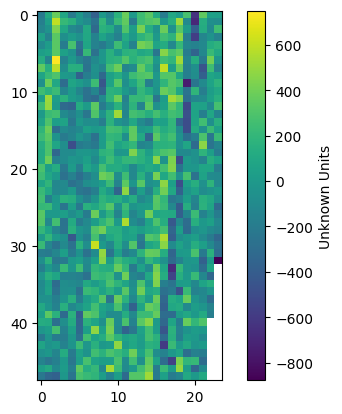

In [26]:
def printmean(frame):
    if "signal" not in frame: return
    if "CtRemovedTimestreams" not in frame: return
    print("Before ct removal: ", np.mean(frame["signal"]["D00B-280"]))
    print("After ct removal: ", np.mean(frame["CtRemovedTimestreams"]["D00B-280"]))
    print("Difference ct removal: ", np.mean(frame["signal"]["D00B-280"]) - np.mean(frame["CtRemovedTimestreams"]["D00B-280"]))

# instantiate binner
binner = SingleMapBinner(det="D00B-280")

# create the pipeline
pipe = core.G3Pipeline()
pipe.Add(core.G3Reader, filename=filename)
pipe.Add(remove_common_mode)
pipe.Add(printmean)
pipe.Add(binner)

# run the pipeline with some simple time/memory useage profiling
pipe.Run(profile=True)

m = binner.data / binner.hits
plt.imshow(m)
plt.colorbar(label="Unknown Units");

In [27]:
from spt3g import maps

out_map = maps.FlatSkyMap(x_len=100, y_len=100, res=0.01*U.deg,
                          alpha_center=ra0, delta_center=dec0,
                          proj=maps.MapProjection.ProjSansonFlamsteed)

pipe = core.G3Pipeline()

pipe.Add(core.G3Reader, filename=filename)
pipe.Add(remove_common_mode)
pipe.Add(maps.SingleDetectorBoresightBinner, stub_map=out_map, pointing="boresight_radec", timestreams="signal")

pipe.Run()

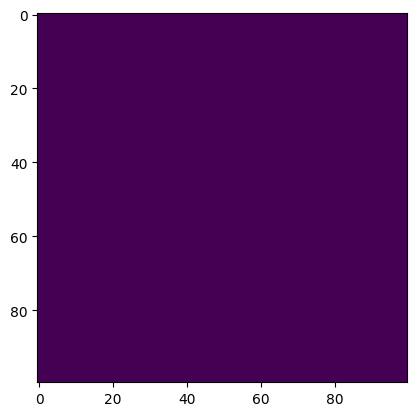

In [28]:
plt.imshow(out_map)
plt.show()

In [29]:
focalplane_bytes = calframe['focalplane']

In [30]:
import io
import h5py as h5
byte_reader = io.BytesIO(np.array(focalplane_bytes, dtype=np.uint8))
with h5.File(byte_reader, "r") as f:
    quat = f['focalplane']['quat']

In [32]:
ra, dec = maps.quathelpers.quat_to_ang(radec_quats[0])
print(ra, dec)

1.1042354530138703 0.40964955486519994


In [33]:
ra, dec, psi = so3g.proj.quat.decompose_lonlat(radec_quats[0])
print(ra, dec)

0.7307137512208712 -0.6980262254666632


-0.5113043292082857 -0.5705224296708271


In [48]:
maps.ang_to_quat(0*U.deg, 0*U.deg)

spt3g.core.quat(0,1,0,0)

In [52]:
root2over2 = 0.707106781187
rotminus90degaboutyaxis = core.quat(np.cos(90/2 * U.deg / U.rad), 0, -1 * np.sin(90/2 * U.deg / U.rad), 0)
ra, dec = maps.quat_to_ang(rotminus90degaboutyaxis * core.quat(0,1,0,0) / rotminus90degaboutyaxis)
print(ra / U.deg, dec / U.deg)

0.0 90.0


In [69]:
ra, dec, psi = so3g.proj.quat.decompose_lonlat(core.quat(0, 1, 0, 0))
print("so3g.proj.quat.decompose_lonlat for quat(0, 1, 0, 0): ", ra / U.deg, dec / U.deg)

so3g.proj.quat.decompose_lonlat for quat(0, 1, 0, 0):  0.0 0.0


In [58]:
ra, dec = maps.quat_to_ang(core.quat(0,1,0,0))
print("spt3g.maps.quat_to_ang for quat(0, 1, 0, 0): ", ra / U.deg, dec / U.deg)

spt3g.maps.quat_to_ang for quat(0, 1, 0, 0):  0.0 0.0


In [68]:
zeroquat = so3g.proj.quat.rotation_lonlat(0, 0, 0)
print("ra=0, dec=0 quat according to so3g.proj.quat.rotation_lonlat", zeroquat)

ra=0, dec=0 quat according to so3g.proj.quat.rotation_lonlat (0.707107,0,0.707107,0)


In [71]:
core.quat(root2over2, 0, root2over2, 0) * core.quat(0, 1, 0, 0) / core.quat(root2over2, 0, root2over2, 0)

spt3g.core.quat(0,0,0,-1)

In [223]:
def norm(vec):
    return (vec[0]**2 + vec[1]**2 + vec[2]**2)**0.5

def analyze(quat):
    angle = 2*np.acos(quat.a)
    uvec = (quat.b / np.sin(angle/2), quat.c / np.sin(angle/2), quat.d / np.sin(angle/2))
    print(f'{angle*180/np.pi=}, {norm(uvec)=}')

for i in azel_quats:
    analyze(i)

(np.float64(0.5325807805251834), np.float64(0.2837746612673494), np.float64(-0.9422924348356646))


ArgumentError: Python argument types in
    quat.__init__(quat, numpy.float64, numpy.float64, numpy.float64)
did not match C++ signature:
    __init__(_object*, double, double, double, double)

In [85]:
analyze(core.quat(0, 1, 0, 0))

angle*180/np.pi=np.float64(180.0), norm(uvec)=np.float64(1.0)


In [277]:
import io
import h5py as h5


fp = calframe['focalplane'] #here frame is the calibration frame
byte_reader = io.BytesIO(np.array(fp, dtype=np.uint8))
with h5.File(byte_reader, "r") as f:
    focalplane = f['focalplane']
    quats = focalplane['quat'].copy()
    names = focalplane['name'].copy()

In [278]:
def norm(vec):
    return (vec[0]**2 + vec[1]**2 + vec[2]**2 + vec[3]**2)**0.5

for name, quat_arr in zip(names, quats): print(name, quat_arr, f'{norm(quat_arr)=:0.5}')

b'D00A-280' [ 0.00379414 -0.00545428  0.60873056  0.79334921] norm(quat_arr)=1.0
b'D00B-280' [-0.0011739  -0.00653962  0.99142011  0.1305451 ] norm(quat_arr)=1.0
b'D01A-280' [ 0.00270884 -0.00283399  0.60874803  0.79335393] norm(quat_arr)=1.0
b'D01B-280' [-8.84972028e-05 -3.91937182e-03  9.91435808e-01  1.30536083e-01] norm(quat_arr)=1.0
b'D02A-280' [ 6.32666482e-03 -8.47591575e-04  2.58803158e-01  9.65908992e-01] norm(quat_arr)=1.0
b'D02B-280' [ 0.00387429 -0.00507297  0.86600227  0.49999933] norm(quat_arr)=1.0
b'D03A-280' [ 1.62349246e-03 -2.13736837e-04  6.08760613e-01  7.93352277e-01] norm(quat_arr)=1.0
b'D03B-280' [ 0.00099685 -0.00129912  0.99144353  0.13052602] norm(quat_arr)=1.0
b'D04A-280' [0.00432123 0.00115787 0.25881646 0.96591616] norm(quat_arr)=1.0
b'D04B-280' [ 0.00387431 -0.00223683  0.86601674  0.499995  ] norm(quat_arr)=1.0
b'D05A-280' [ 0.00724725 -0.00095412  0.60874516  0.79333214] norm(quat_arr)=1.0
b'D05B-280' [ 0.00444992 -0.00579924  0.99141837  0.1305227 ] nor

In [312]:
def quat_from_arr(arr):
    # return core.quat(arr[1], arr[2], arr[3], arr[0])
    return core.quat(*arr)

detector_offset_quats = {names[i].decode('UTF-8'):quat_from_arr(quats[i]) for i in range(len(names))}
detector_offset_quats

{'D00A-280': spt3g.core.quat(0.00379414,-0.00545428,0.608731,0.793349),
 'D00B-280': spt3g.core.quat(-0.0011739,-0.00653962,0.99142,0.130545),
 'D01A-280': spt3g.core.quat(0.00270884,-0.00283399,0.608748,0.793354),
 'D01B-280': spt3g.core.quat(-8.84972e-05,-0.00391937,0.991436,0.130536),
 'D02A-280': spt3g.core.quat(0.00632666,-0.000847592,0.258803,0.965909),
 'D02B-280': spt3g.core.quat(0.00387429,-0.00507297,0.866002,0.499999),
 'D03A-280': spt3g.core.quat(0.00162349,-0.000213737,0.608761,0.793352),
 'D03B-280': spt3g.core.quat(0.000996848,-0.00129912,0.991444,0.130526),
 'D04A-280': spt3g.core.quat(0.00432123,0.00115787,0.258816,0.965916),
 'D04B-280': spt3g.core.quat(0.00387431,-0.00223683,0.866017,0.499995),
 'D05A-280': spt3g.core.quat(0.00724725,-0.000954119,0.608745,0.793332),
 'D05B-280': spt3g.core.quat(0.00444992,-0.00579924,0.991418,0.130523),
 'D06A-280': spt3g.core.quat(0.00335003,0.00203633,0.608765,0.793341),
 'D06B-280': spt3g.core.quat(0.00380873,-0.000928926,0.991439

In [334]:
initial_boresight_quat = firstscanframe['boresight_radec'][0]
# initial_boresight_quat = core.quat(0, 1, 0, 0)

initial_detector_quats = {name:  offset_quat * initial_boresight_quat / offset_quat for name, offset_quat in detector_offset_quats.items()}
initial_detector_ra = {name:spt3g.maps.quat_to_ang(quat)[0] for name, quat in initial_detector_quats.items()}
initial_detector_dec = {name:spt3g.maps.quat_to_ang(quat)[1] for name, quat in initial_detector_quats.items()}

name_strings = [name.decode('UTF-8') for name in names]

ra_deg = []
dec_deg = []
for det in name_strings:
    ra_deg.append(initial_detector_ra[det] / U.deg)
    dec_deg.append(initial_detector_dec[det] / U.deg)
    print(initial_detector_ra[det], initial_detector_dec[det])

2.7558787117840122 1.0948198195592393
2.016390926997344 -0.17325226211265343
2.7503341801586645 1.0998853851210344
2.010680246960363 -0.1738938539983231
-2.266818188856958 0.8518160017050689
2.0821930677488205 0.5298715773290963
2.744682482612717 1.1049391188528375
2.004968141119316 -0.1745278501653857
-2.259648429742576 0.8549521603899907
2.0758270536630885 0.5312517095610979
2.7427859217907753 1.0975437520556375
2.01169616309736 -0.17792681195389767
2.7380382076762353 1.1062857716398815
2.002618219879211 -0.17683947145749465
-2.2581078590633337 0.8580718224650793
2.0723722406098157 0.5298837605679809
2.7313719769082954 1.1076285940551291
2.0002553903142197 -0.17913940927582717
-2.013325789615796 -0.30797716796569824
-2.502697724214396 1.03753241660733
-2.016359537077949 -0.30561077026547734
-2.5096699902784914 1.036359031426391
-2.380773819883995 -0.9636181664280313
-2.036977487010744 0.4043314373485905
-2.0193780097040306 -0.3032294584459406
-2.516624265744599 1.035179609745092
-2.3

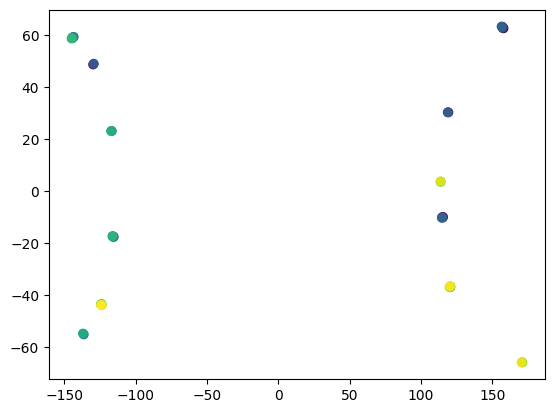

In [335]:
plt.scatter(ra_deg, dec_deg, c=range(len(ra_deg)))
plt.show()